# Projeto: Redes Neurais

**Degree**: Data Science | **Turma**: 815 | **Instituição**: Let's Code | **Módulo**: XIV - Redes Neurais

Professor: [Sandro Saorin](https://github.com/saorinsandro)

### Grupo

**Colegas participantes do grupo para o projeto**:


* [Ana Gabriela de Castro Almeida](https://github.com/almeidacastrogabriela)

* [Arthur Hahn](https://github.com/ArthurHahn)

* [Douglas Alves](https://github.com/dougalve)

* [Jeremias Diefenthaler](https://github.com/JeremiasDief)

Para resolver o projeto, o grupo deve escolher um `dataset` e desenvolver os itens abaixo:

__A)__ (10 pontos) Desenvolva uma análise exploratória dos dados adequada;

__B)__ (5 pontos) Faça a preparação dos dados para treinar os modelos;

__C)__ (15 pontos) Teste pelo menos 3 modelos de _Machine Learning_ convencional, sendo algumas sugestões como Regressão Logística, Árvore de Decisão, _Random Forest_ entre outros;

__D)__ (30 pontos) Desenvolva uma rede neural _Perceptron_ para fazer a separação entre as classes. O modelo consegue fazer a separação linear dos dados? Avaliar utilizando o PCA caso necessário;

__E)__ (30 pontos) Monte duas redes neurais utilizando combinações de camadas diferentes (teste algumas combinações para chegar em uma melhor performance dos resultados).

__F)__ (10 pontos) Qual dos modelos teve a melhor performance entre os modelos convencionais, _Perceptron_ e Rede Neural? Discuta um pouco a respeito.

<br>


----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------

### Sobre o Dataset


### Contexto

Dataset para **Classificação de Imagens de Satélite - RSI - CB256**. Este dataset possui **4 classes diferentes** combinando ***sensores*** e *snapshots* do ***Google Maps***.

### Avisos

O dataset abaixo é parte de um artigo de estudo que desenvolveu um novo dataset de referência na comunidade de sensoriamento remoto. Maiores informações sobre o processo de estudo podem ser encontradas diretamente no [artigo em questão.](http://paperswithcode.com/paper/dirs-on-creating-benchmark-datasets-for/)

### Introdução sobre a origem do *dataset*

Com base no artigo de pesquisa mencionado, foi desenvolvido um novo dataset de referência para interpretação de imagens de sensoriamento remoto (SR), denominado Million-AID.

A interpretação de imagens SR tem desempenhado um papel cada vez mais importante em uma grande diversidade de aplicações, o que atraiu uma quantidade impressionante de pesquisa. Por isso, diversos datasets foram construídos para avançar o desenvolvimento de algoritmos de interpretação para imagens SR.
Abrangendo a literatura publicada na última década, foi realizada uma revisão sistemática dos datasets de imagem SR relacionados às tarefas de interpretação de imagens SR tradicionais atualmente, **incluindo classificação de cena, detecção de objeto, segmentação semântica e detecção de mudanças.**


Palavras-chave: Inteligência artificial, processamento de imagem, Deep Learning, Redes Neurais, Imagem de Satélite, Sensoriamento Remoto

---------------------
---------------------

#### Importando as bibliotecas necessárias

In [1]:
#Usual libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import glob
import random
import warnings
warnings.filterwarnings('ignore')

#Image lib
import cv2

#Machine Learning libs
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten
import tensorflow.keras as keras
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Definição do diretório onde se encontram as imagens e definição do nome das classes (pastas com as imagens)

#dir_ = '../input/satellite-image-classification/data'
dir_ = './data'
terrain_types = (list(os.listdir(f'{dir_}')))

In [3]:
# Lista com o nome das pastas onde se encontram as imagens, que por consequência, são os nomes das classes

terrain_types

['cloudy', 'desert', 'green_area', 'water']

In [4]:
# Carregando o dataset, redimensionando as imagens para 28x28 e normalizando ao dividir cada uma por 255

img_dataset = []
labels = []

for terrain in terrain_types:
    for filename in os.listdir(f'{dir_}/{terrain}'):
        img = cv2.imread(f'{dir_}/{terrain}/{filename}')
        img = cv2.resize(img,(28,28))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img/255
        img_dataset.append(img)
        labels.append(terrain)

In [5]:
# Verificando o shape de uma imagem qualquer

img_dataset[1499].shape

(28, 28, 3)

In [6]:
# Verificando o tamanho do dataset de imagens

len(img_dataset)

5631

In [7]:
# Verificando o tamanho do dataset com as labels

len(labels)

5631

In [8]:
# Verificando a quantidade de imagens por cada classe

print("Números de imagens classe 'cloudy':", labels.count("cloudy"))
print("Números de imagens classe 'desert':", labels.count("desert"))
print("Números de imagens classe 'green_area':", labels.count("green_area"))
print("Números de imagens classe 'water':", labels.count("water"))

Números de imagens classe 'cloudy': 1500
Números de imagens classe 'desert': 1131
Números de imagens classe 'green_area': 1500
Números de imagens classe 'water': 1500


A classe desta imagem é:  green_area


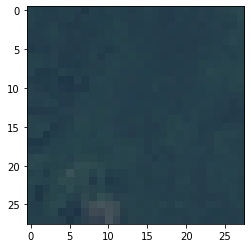

In [9]:
# Visualização de uma imagem aleatória e seu label

plt.imshow(img_dataset[2631])

print("A classe desta imagem é: ", labels[2631])

In [10]:
# Transformar o dataset de labels para formatos numéricos

labels_encoded = labels.copy()

for idx, classe in enumerate(labels_encoded):
    if classe == "cloudy":
        labels_encoded[idx] = 0
    elif classe == 'desert':
        labels_encoded[idx] = 1
    elif classe == 'green_area':
        labels_encoded[idx] = 2
    else:
        labels_encoded[idx] = 3

In [11]:
# Verificar o tamanho do dataset de labels após a codificação

len(labels_encoded)

5631

In [12]:
#Convertendo as listas em np.array

arr_img_dataset = np.array(img_dataset)
arr_labels = np.array(labels_encoded)

In [13]:
# Verificando o shape dos arrays

arr_img_dataset.shape, arr_labels.shape

((5631, 28, 28, 3), (5631,))

In [14]:
# Verificando o array com os labels codificados

arr_labels

array([0, 0, 0, ..., 3, 3, 3])

Example training images and their labels: [954, 589, 4305, 1281, 5580]
Corresponding classes for the labels: ['cloudy', 'cloudy', 'water', 'cloudy', 'water']


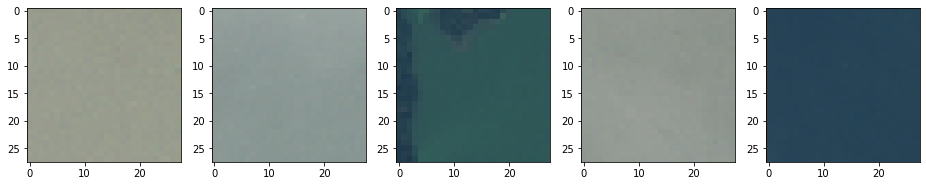

------------------------------------------------------------------------------------------------------------------------
Example training images and their labels: [2788, 3538, 504, 2101, 3730]
Corresponding classes for the labels: ['green_area', 'green_area', 'cloudy', 'desert', 'green_area']


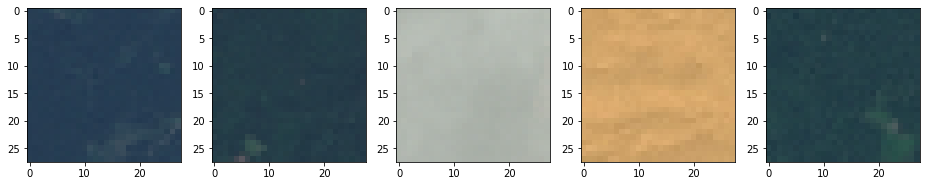

In [15]:
# Visualizando imagens aleatórias dos datasets com suas respectivas classificações

random_imgs = np.random.choice(arr_labels.shape[0], size=5, replace=False)
classes = ['cloudy', 'desert', 'green_area', 'water']
print('Example training images and their labels: ' + str([x for x in random_imgs])) 
print('Corresponding classes for the labels: ' + str([classes[x] for x in arr_labels[random_imgs]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for enum, i in enumerate(random_imgs):
    img = arr_img_dataset[i]
    axarr[enum].imshow(img)
plt.show()

print("-"*120)

random_imgs2 = np.random.choice(arr_labels.shape[0], size=5, replace=False)
classes = ['cloudy', 'desert', 'green_area', 'water']
print('Example training images and their labels: ' + str([x for x in random_imgs2])) 
print('Corresponding classes for the labels: ' + str([classes[x] for x in arr_labels[random_imgs2]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for enum, i in enumerate(random_imgs2):
    img = arr_img_dataset[i]
    axarr[enum].imshow(img)
plt.show()

------------------------------
--------------------------

### Separação em treino e teste

In [16]:
# train_test_split com 20% separado para o teste, estratificando pelo dataset com as labels

X_train, X_test, y_train, y_test = train_test_split(arr_img_dataset, 
                                                    arr_labels, 
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    stratify = arr_labels)

In [17]:
# Verificando o tamanho dos datasets de treino e de teste

print(len(X_train), len(X_test), len(y_train), len(y_test))

4504 1127 4504 1127


In [18]:
# Verificando a quantidade de imagens por classe nos datasets de treino e de teste

classes = ['cloudy', 'desert', 'green_area', 'water']

for c in range(4):
    cont = 0
    for a in y_train:
        if a == c:
            cont += 1
    print(f"Quantidade de imagens no dataset de treino para a classe {classes[c]}: {cont}")

    cont = 0
    for a in y_test:
        if a == c:
            cont += 1
    print(f"Quantidade de imagens no dataset de teste para a classe {classes[c]}: {cont}")
    
    print()

Quantidade de imagens no dataset de treino para a classe cloudy: 1200
Quantidade de imagens no dataset de teste para a classe cloudy: 300

Quantidade de imagens no dataset de treino para a classe desert: 904
Quantidade de imagens no dataset de teste para a classe desert: 227

Quantidade de imagens no dataset de treino para a classe green_area: 1200
Quantidade de imagens no dataset de teste para a classe green_area: 300

Quantidade de imagens no dataset de treino para a classe water: 1200
Quantidade de imagens no dataset de teste para a classe water: 300



### Modelos de Machine Learning

In [19]:
# Redimensionando os shapes dos datasets de treino para poder rodar os modelos de ML

X_train_ml = X_train.reshape(X_train.shape[0], -1)
X_train_ml.shape

(4504, 2352)

In [20]:
# Redimensionando os shapes dos datasets de teste para poder rodar os modelos de ML

X_test_ml = X_test.reshape(X_test.shape[0], -1)
X_test_ml.shape

(1127, 2352)

In [21]:
# Função para testar vários modelos e devolver as métricas de treino e de teste

def test_models_metrics(model_list, col_model_name, col_model, X_train, X_test, y_train, y_test):
    list_results = []
    for mdl in model_list:
        model_metrics = []
        model = mdl[col_model]
        model.fit(X_train, y_train)
        y_predict_train = model.predict(X_train)
        y_predict_test = model.predict(X_test)
        print("Model             : %s" % mdl[col_model_name])
        model_metrics.append(mdl[col_model_name])
        print("Accuracy (treino)  : %0.4f " %  accuracy_score(y_train, y_predict_train))
        model_metrics.append(accuracy_score(y_train, y_predict_train))
        print("Accuracy (teste)  : %0.4f " %  accuracy_score(y_test, y_predict_test))
        model_metrics.append(accuracy_score(y_test, y_predict_test))
        print("Precision (treino) : %0.4f " % precision_score(y_train, y_predict_train, average='weighted'))
        model_metrics.append(precision_score(y_train, y_predict_train, average='weighted'))
        print("Precision (teste) : %0.4f " % precision_score(y_test, y_predict_test, average='weighted'))
        model_metrics.append(precision_score(y_test, y_predict_test, average='weighted'))
        print("Recall (treino)    : %0.4f " % recall_score(y_train, y_predict_train, average='weighted'))
        model_metrics.append(recall_score(y_train, y_predict_train, average='weighted'))
        print("Recall (teste)    : %0.4f " % recall_score(y_test, y_predict_test, average='weighted'))
        model_metrics.append(recall_score(y_test, y_predict_test, average='weighted'))
        print("F1 - Score (treino): %0.4f " % f1_score(y_train, y_predict_train, average='weighted'))
        model_metrics.append(f1_score(y_train, y_predict_train, average='weighted'))
        print("F1 - Score (teste): %0.4f " % f1_score(y_test, y_predict_test, average='weighted'))
        model_metrics.append(f1_score(y_test, y_predict_test, average='weighted'))
        print("-"*40)
        list_results.append(model_metrics)
        # Classification report
        print("Classification report do treino:")
        print(classification_report(y_train, y_predict_train))
        print("Classification report do teste:")
        print(classification_report(y_test, y_predict_test))
        # Matriz de Confusão
        cm = confusion_matrix(y_test, y_predict_test)
        print("Matriz de confusão do modelo nos dados de teste:\n")
        plot_confusion_matrix(conf_mat=cm)
        plt.show()
        print("="*80)
        
    return list_results

In [22]:
# Define uma seed aleatória
random_seed = 42

# Define uma lista de modelos a serem testados
list_models = [
    {"model_name": "Logistic_Regression",
     "estimator": LogisticRegression(random_state=random_seed, solver="lbfgs")},
    {"model_name": "Decision_Tree",
     "estimator": DecisionTreeClassifier(random_state=random_seed, max_depth=5)},
    {"model_name": "Random_Forest",
     "estimator": RandomForestClassifier(random_state=random_seed, max_depth=5)},
    {"model_name": "AdaBoost",
     "estimator": AdaBoostClassifier(random_state=random_seed)},
    {"model_name": "SVM",
     "estimator": SVC(random_state=random_seed)},
    {"model_name": "Perceptron",
     "estimator": Perceptron(random_state=random_seed)}
]

Model             : Logistic_Regression
Accuracy (treino)  : 0.8481 
Accuracy (teste)  : 0.8181 
Precision (treino) : 0.8480 
Precision (teste) : 0.8189 
Recall (treino)    : 0.8481 
Recall (teste)    : 0.8181 
F1 - Score (treino): 0.8477 
F1 - Score (teste): 0.8182 
----------------------------------------
Classification report do treino:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1200
           1       0.90      0.97      0.93       904
           2       0.78      0.79      0.78      1200
           3       0.78      0.76      0.77      1200

    accuracy                           0.85      4504
   macro avg       0.85      0.86      0.85      4504
weighted avg       0.85      0.85      0.85      4504

Classification report do teste:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       300
           1       0.92      0.96      0.94       227
           2       0.72     

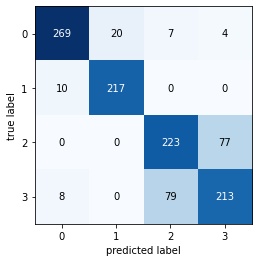

Model             : Decision_Tree
Accuracy (treino)  : 0.9198 
Accuracy (teste)  : 0.8616 
Precision (treino) : 0.9210 
Precision (teste) : 0.8621 
Recall (treino)    : 0.9198 
Recall (teste)    : 0.8616 
F1 - Score (treino): 0.9197 
F1 - Score (teste): 0.8615 
----------------------------------------
Classification report do treino:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1200
           1       0.96      0.95      0.95       904
           2       0.87      0.93      0.90      1200
           3       0.92      0.85      0.88      1200

    accuracy                           0.92      4504
   macro avg       0.92      0.92      0.92      4504
weighted avg       0.92      0.92      0.92      4504

Classification report do teste:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       300
           1       0.91      0.90      0.91       227
           2       0.81      0.85 

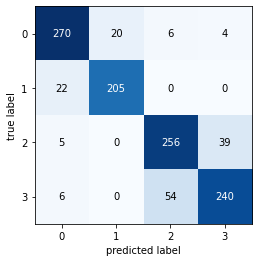

Model             : Random_Forest
Accuracy (treino)  : 0.9216 
Accuracy (teste)  : 0.8997 
Precision (treino) : 0.9242 
Precision (teste) : 0.9025 
Recall (treino)    : 0.9216 
Recall (teste)    : 0.8997 
F1 - Score (treino): 0.9215 
F1 - Score (teste): 0.8998 
----------------------------------------
Classification report do treino:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1200
           1       0.95      0.95      0.95       904
           2       0.86      0.95      0.90      1200
           3       0.94      0.85      0.89      1200

    accuracy                           0.92      4504
   macro avg       0.93      0.92      0.92      4504
weighted avg       0.92      0.92      0.92      4504

Classification report do teste:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       300
           1       0.94      0.92      0.93       227
           2       0.83      0.93 

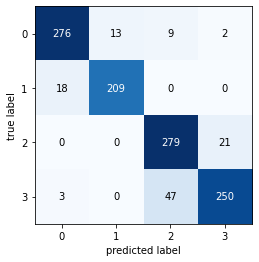

Model             : AdaBoost
Accuracy (treino)  : 0.5924 
Accuracy (teste)  : 0.5892 
Precision (treino) : 0.5374 
Precision (teste) : 0.5281 
Recall (treino)    : 0.5924 
Recall (teste)    : 0.5892 
F1 - Score (treino): 0.4905 
F1 - Score (teste): 0.4908 
----------------------------------------
Classification report do treino:
              precision    recall  f1-score   support

           0       0.56      0.97      0.71      1200
           1       0.00      0.00      0.00       904
           2       0.58      1.00      0.73      1200
           3       0.88      0.26      0.40      1200

    accuracy                           0.59      4504
   macro avg       0.50      0.56      0.46      4504
weighted avg       0.54      0.59      0.49      4504

Classification report do teste:
              precision    recall  f1-score   support

           0       0.55      0.95      0.70       300
           1       0.00      0.00      0.00       227
           2       0.57      0.99      

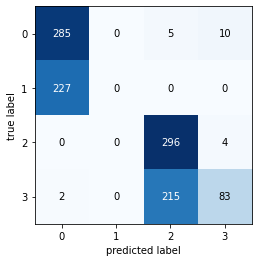

Model             : SVM
Accuracy (treino)  : 0.9161 
Accuracy (teste)  : 0.9095 
Precision (treino) : 0.9186 
Precision (teste) : 0.9120 
Recall (treino)    : 0.9161 
Recall (teste)    : 0.9095 
F1 - Score (treino): 0.9158 
F1 - Score (teste): 0.9094 
----------------------------------------
Classification report do treino:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1200
           1       0.94      0.96      0.95       904
           2       0.85      0.94      0.89      1200
           3       0.93      0.83      0.88      1200

    accuracy                           0.92      4504
   macro avg       0.92      0.92      0.92      4504
weighted avg       0.92      0.92      0.92      4504

Classification report do teste:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       300
           1       0.93      0.95      0.94       227
           2       0.84      0.94      0.89 

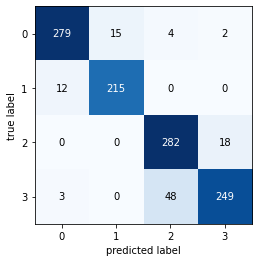

Model             : Perceptron
Accuracy (treino)  : 0.7771 
Accuracy (teste)  : 0.7498 
Precision (treino) : 0.7894 
Precision (teste) : 0.7623 
Recall (treino)    : 0.7771 
Recall (teste)    : 0.7498 
F1 - Score (treino): 0.7749 
F1 - Score (teste): 0.7475 
----------------------------------------
Classification report do treino:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1200
           1       0.87      0.76      0.81       904
           2       0.84      0.62      0.71      1200
           3       0.69      0.85      0.76      1200

    accuracy                           0.78      4504
   macro avg       0.79      0.78      0.78      4504
weighted avg       0.79      0.78      0.77      4504

Classification report do teste:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       300
           1       0.88      0.74      0.80       227
           2       0.78      0.58    

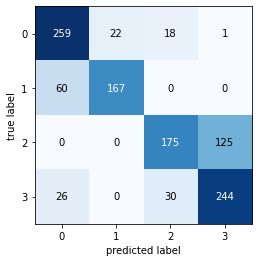

In [23]:
# Chama a função definida anteriormente para rodas os modelos de ML escolhidos

model_metrics = test_models_metrics(list_models,
                                    "model_name",
                                    "estimator",
                                    X_train_ml,
                                    X_test_ml,
                                    y_train,
                                    y_test)

In [24]:
# Cria um DataFrame com as métricas dos modelos testados

df_models_metrics = pd.DataFrame(model_metrics, columns=["model_name", "accuracy_train", "accuracy_test",
                                                         "precision_train", "precision_test",
                                                         "recall_train", "recall_test",
                                                         "f1_score_train", "f1_score_test"])

In [25]:
# Dataframe com as métricas dos modelos testados, em ordem decrescente da maior acurácia no teste

df_models_metrics.sort_values("accuracy_test", ascending=False)

,model_name,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test,f1_score_train,f1_score_test
4,SVM,0.916075,0.909494,0.918642,0.912048,0.916075,0.909494,0.915844,0.909361
2,Random_Forest,0.921625,0.899734,0.924203,0.902459,0.921625,0.899734,0.921531,0.899837
1,Decision_Tree,0.919849,0.861579,0.921017,0.862115,0.919849,0.861579,0.919720,0.861502
0,Logistic_Regression,0.848135,0.818101,0.848017,0.818882,0.848135,0.818101,0.847742,0.818222
5,Perceptron,0.777087,0.749778,0.789367,0.762252,0.777087,0.749778,0.774862,0.747522
3,AdaBoost,0.592362,0.589175,0.537360,0.528071,0.592362,0.589175,0.490484,0.490827


------------------------

### Verificando a separação entre as classes utilizando o modelo Perceptron com PCA

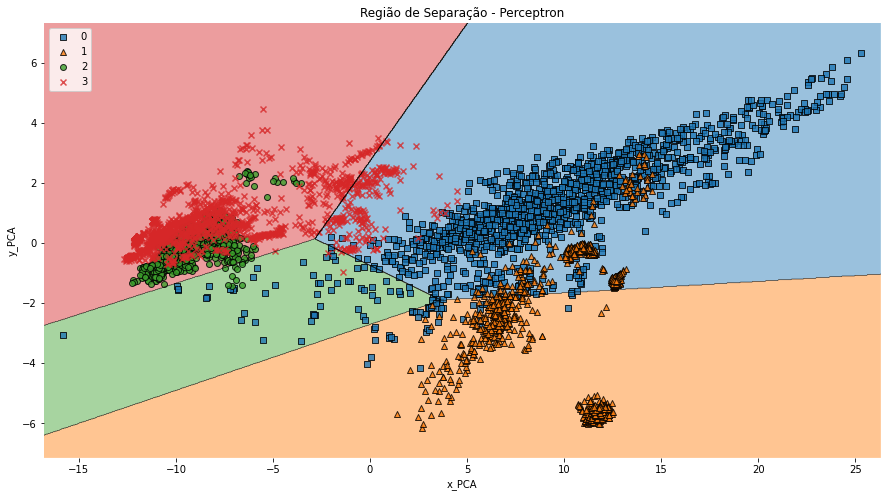

In [26]:
# Instancia o modelo Perceptron
model = Perceptron()

# Cria o X e o y
X = arr_img_dataset.reshape(arr_img_dataset.shape[0], -1)
y = arr_labels

# PCA
pca = PCA(n_components = 2, random_state = 42)
X_pca = pca.fit_transform(X)
model.fit(X_pca, y)

# Plot da região de separação
fig = plt.figure(figsize=(15,8))
fig = plot_decision_regions(X_pca, 
                      y, 
                      clf = model, 
                      legend = 2)

plt.xlabel('x_PCA')
plt.ylabel('y_PCA')
plt.title('Região de Separação - Perceptron')
plt.legend()
plt.show()

> __Como pode ser visto no gráfico acima, as classes têm uma leve separabilidade com PCA, porém não apresentam uma linearidade definida.__

---------------------
----------------------

## Redes Neurais

In [27]:
# Separando mais uma vez, agora em treino e validação (20%) e estratificando pelo dataset y_train

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


# Verificando os shapes de todos os datasets separados em treino, validação e teste
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(3603, 28, 28, 3) (901, 28, 28, 3) (1127, 28, 28, 3) (3603,) (901,) (1127,)


In [28]:
# Verificando a quantidade de imagens por classe nos datasets de treino, validação e de teste

classes = ['cloudy', 'desert', 'green_area', 'water']

for c in range(4):
    cont = 0
    for a in y_train:
        if a == c:
            cont += 1
    print(f"Quantidade de imagens no dataset de treino para a classe {classes[c]}: {cont}")

    cont = 0
    for a in y_test:
        if a == c:
            cont += 1
    print(f"Quantidade de imagens no dataset de validação para a classe {classes[c]}: {cont}")

    cont = 0
    for a in y_val:
        if a == c:
            cont += 1
    print(f"Quantidade de imagens no dataset de teste para a classe {classes[c]}: {cont}")
    
    print()

Quantidade de imagens no dataset de treino para a classe cloudy: 960
Quantidade de imagens no dataset de validação para a classe cloudy: 300
Quantidade de imagens no dataset de teste para a classe cloudy: 240

Quantidade de imagens no dataset de treino para a classe desert: 723
Quantidade de imagens no dataset de validação para a classe desert: 227
Quantidade de imagens no dataset de teste para a classe desert: 181

Quantidade de imagens no dataset de treino para a classe green_area: 960
Quantidade de imagens no dataset de validação para a classe green_area: 300
Quantidade de imagens no dataset de teste para a classe green_area: 240

Quantidade de imagens no dataset de treino para a classe water: 960
Quantidade de imagens no dataset de validação para a classe water: 300
Quantidade de imagens no dataset de teste para a classe water: 240



In [29]:
### Montar as camadas
# 1 camada de convolução com 28 filtros e filtros com 3x3, ativação relu
# 1 camada MaxPooling com janela 2x2
# Camada Flatten
# 1 camada Dense com 100 neurônios e ativação relu
# Camada de saída com 4 neurônios e ativação softamax

cnn1 = keras.Sequential([
      keras.layers.Conv2D(28,                      # número de filtros
                         (3,3),                    # dimensão do filtro
                         activation="relu",        # função de ativação
                         input_shape=(28, 28, 3)), # tamanho da entrada                                                                         
      keras.layers.MaxPooling2D((2,2)),            # tamanho da janela pooling
      keras.layers.Flatten(),                      # vetoriza as matrizes
      # Parte MLP
      keras.layers.Dense(100, activation="relu"),
      keras.layers.Dense(4, activation="softmax")
])

In [30]:
# Crie um compile() com os seguintes parametros:
cnn1.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

# Define os pesos
pesos_iniciais1 = cnn1.get_weights()

# Crie o summary() para o modelo
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 100)               473300    
                                                                 
 dense_1 (Dense)             (None, 4)                 404       
                                                                 
Total params: 474,488
Trainable params: 474,488
Non-trainable params: 0
__________________________________________________

In [31]:
# Fit do modelo, epochs = 10

history = cnn1.fit(X_train, 
                   y_train,
                   epochs=10,
                   verbose=1,
                   validation_data=(X_val,y_val))

Epoch 1/10
113/113 [==============================] - 4s 27ms/step - loss: 0.5836 - accuracy: 0.7163 - val_loss: 0.4514 - val_accuracy: 0.8047
Epoch 2/10
113/113 [==============================] - 3s 24ms/step - loss: 0.4956 - accuracy: 0.7649 - val_loss: 0.4001 - val_accuracy: 0.8724
Epoch 3/10
113/113 [==============================] - 3s 22ms/step - loss: 0.4002 - accuracy: 0.8249 - val_loss: 0.4008 - val_accuracy: 0.8257
Epoch 4/10
113/113 [==============================] - 3s 23ms/step - loss: 0.3968 - accuracy: 0.8301 - val_loss: 0.3617 - val_accuracy: 0.8324
Epoch 5/10
113/113 [==============================] - 3s 23ms/step - loss: 0.3526 - accuracy: 0.8573 - val_loss: 0.3191 - val_accuracy: 0.8679
Epoch 6/10
113/113 [==============================] - 3s 24ms/step - loss: 0.3204 - accuracy: 0.8671 - val_loss: 0.3330 - val_accuracy: 0.8535
Epoch 7/10
113/113 [==============================] - 3s 22ms/step - loss: 0.2963 - accuracy: 0.8801 - val_loss: 0.2805 - val_accuracy: 0.8923

In [32]:
# método pra predizer as classes finais
y_pred_train = np.argmax(cnn1.predict(X_train), axis = -1)
y_pred_val = np.argmax(cnn1.predict(X_val), axis = -1)
y_pred_test = np.argmax(cnn1.predict(X_test), axis = -1)

36/36 [==============================] - 0s 7ms/step


In [33]:
# Classification report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_train, y_pred_train))
print("############################")
print(classification_report(y_val, y_pred_val))
print("############################")
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       960
           1       0.88      0.97      0.92       723
           2       0.85      0.95      0.90       960
           3       0.93      0.83      0.88       960

    accuracy                           0.90      3603
   macro avg       0.91      0.91      0.90      3603
weighted avg       0.91      0.90      0.90      3603

############################
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       240
           1       0.87      0.94      0.91       181
           2       0.83      0.97      0.90       240
           3       0.95      0.79      0.86       240

    accuracy                           0.89       901
   macro avg       0.90      0.90      0.89       901
weighted avg       0.90      0.89      0.89       901

############################
              precision    recall  f1-score   support

           0     

Matriz de confusão do modelo nos dados de teste:



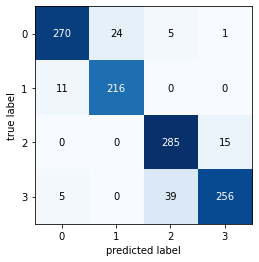

In [34]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_test)

print("Matriz de confusão do modelo nos dados de teste:\n")
plot_confusion_matrix(conf_mat=cm)
plt.show()

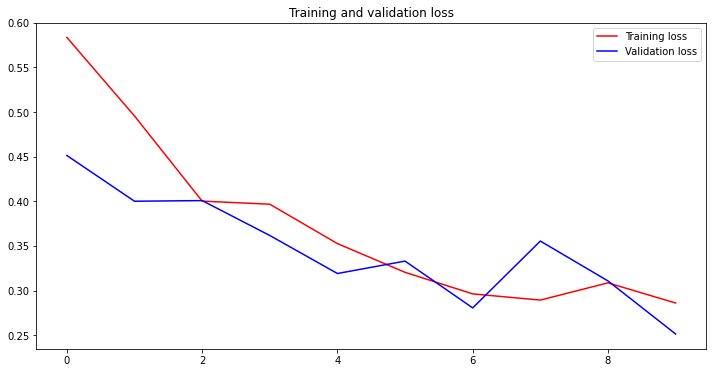

In [35]:
# valor da função de perda NOS DADOS DE TREINO a cada epoch
loss = history.history['loss']

# valor da função de perda NOS DADOS DE VALIDAÇÃO a cada epoch
val_loss = history.history['val_loss']

# numero de epochs
epochs = range(len(loss))

# plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'red', label = 'Training loss')
plt.plot(epochs, val_loss, 'blue', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

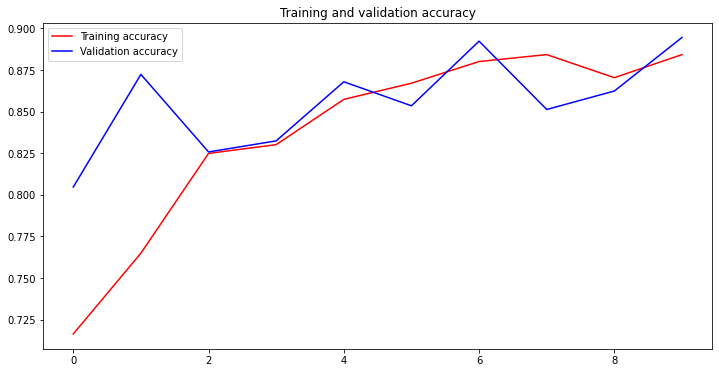

In [36]:
# valor da função de perda NOS DADOS DE TREINO a cada epoch
acc = history.history['accuracy']

# valor da função de perda NOS DADOS DE VALIDAÇÃO a cada epoch
val_acc = history.history['val_accuracy']

# numero de epochs
epochs = range(len(acc))

# plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, 'red', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'blue', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

----------------------------------------

In [37]:
# Criando uma segunda arquitetura de rede, agora acrescentando uma camada Dropout de 10% entre as duas camadas Dense

cnn2 = keras.Sequential([
       keras.layers.Conv2D(28,                      # número de filtros
                          (3,3),                    # dimensão do filtro
                          activation="relu",        # função de ativação
                          input_shape=(28, 28, 3)), # tamanho da entrada                                                                         
       keras.layers.MaxPooling2D((2,2)),            # tamanho da janela pooling
       keras.layers.Flatten(),                      # vetoriza as matrizes
       # Parte MLP
       keras.layers.Dense(100, activation="relu"),
       keras.layers.Dropout(0.1),
       keras.layers.Dense(4, activation="softmax")
])

In [38]:
# Crie um compile() com os seguintes parametros:
cnn2.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

# Define os pesos
pesos_iniciais2 = cnn2.get_weights()

# Crie o summary() para o modelo
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               473300    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 404       
                                                      

In [39]:
# Fit do modelo, epochs = 20
history = cnn2.fit(X_train, 
                   y_train,
                   epochs=20,
                   verbose=1,
                   validation_data=(X_val,y_val))

Epoch 1/20
113/113 [==============================] - 3s 24ms/step - loss: 0.6985 - accuracy: 0.6384 - val_loss: 0.4736 - val_accuracy: 0.8235
Epoch 2/20
113/113 [==============================] - 2s 22ms/step - loss: 0.4497 - accuracy: 0.7882 - val_loss: 0.4157 - val_accuracy: 0.8535
Epoch 3/20
113/113 [==============================] - 2s 21ms/step - loss: 0.3854 - accuracy: 0.8343 - val_loss: 0.4133 - val_accuracy: 0.7814
Epoch 4/20
113/113 [==============================] - 3s 24ms/step - loss: 0.3717 - accuracy: 0.8462 - val_loss: 0.3134 - val_accuracy: 0.8713
Epoch 5/20
113/113 [==============================] - 3s 24ms/step - loss: 0.3435 - accuracy: 0.8573 - val_loss: 0.3128 - val_accuracy: 0.8824
Epoch 6/20
113/113 [==============================] - 3s 24ms/step - loss: 0.3331 - accuracy: 0.8585 - val_loss: 0.2689 - val_accuracy: 0.8923
Epoch 7/20
113/113 [==============================] - 3s 24ms/step - loss: 0.2999 - accuracy: 0.8712 - val_loss: 0.2654 - val_accuracy: 0.8757

In [40]:
# método pra predizer as classes finais
y_pred_train = np.argmax(cnn2.predict(X_train), axis = -1)
y_pred_val = np.argmax(cnn2.predict(X_val), axis = -1)
y_pred_test = np.argmax(cnn2.predict(X_test), axis = -1)

36/36 [==============================] - 0s 10ms/step


In [41]:
# Classification report

print(classification_report(y_train, y_pred_train))
print("############################")
print(classification_report(y_val, y_pred_val))
print("############################")
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       960
           1       0.94      0.96      0.95       723
           2       0.89      0.97      0.93       960
           3       0.96      0.85      0.90       960

    accuracy                           0.93      3603
   macro avg       0.93      0.93      0.93      3603
weighted avg       0.93      0.93      0.93      3603

############################
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       240
           1       0.90      0.94      0.92       181
           2       0.86      0.97      0.91       240
           3       0.96      0.79      0.87       240

    accuracy                           0.90       901
   macro avg       0.91      0.91      0.90       901
weighted avg       0.91      0.90      0.90       901

############################
              precision    recall  f1-score   support

           0     

Matriz de confusão do modelo nos dados de teste:



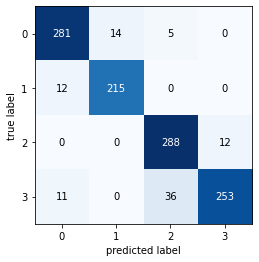

In [42]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_test)

print("Matriz de confusão do modelo nos dados de teste:\n")
plot_confusion_matrix(conf_mat=cm)
plt.show()

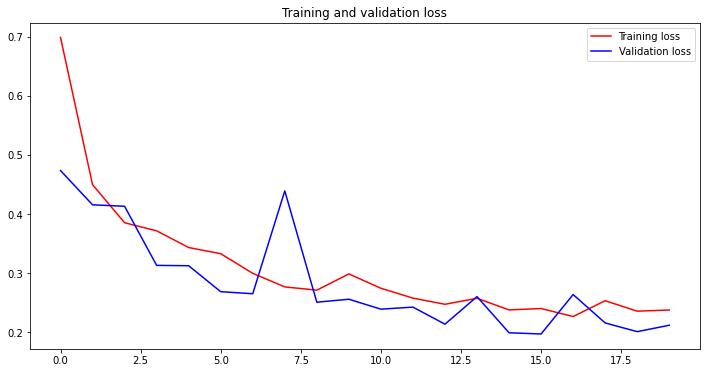

In [43]:
# valor da função de perda NOS DADOS DE TREINO a cada epoch
loss = history.history['loss']

# valor da função de perda NOS DADOS DE VALIDAÇÃO a cada epoch
val_loss = history.history['val_loss']

# numero de epochs
epochs = range(len(loss))

# plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'red', label = 'Training loss')
plt.plot(epochs, val_loss, 'blue', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

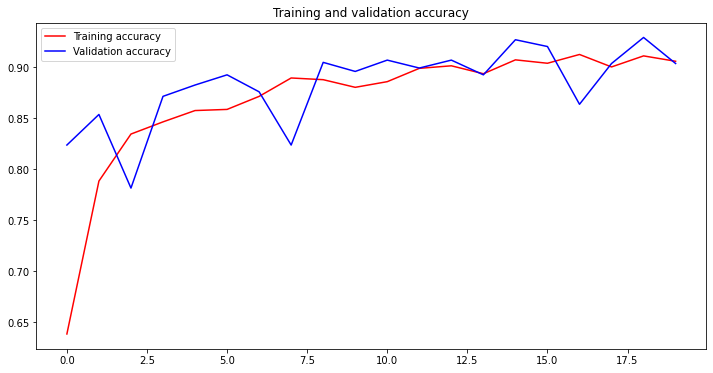

In [44]:
# valor da função de perda NOS DADOS DE TREINO a cada epoch
acc = history.history['accuracy']

# valor da função de perda NOS DADOS DE VALIDAÇÃO a cada epoch
val_acc = history.history['val_accuracy']

# numero de epochs
epochs = range(len(acc))

# plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, 'red', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'blue', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

------------------

In [45]:
# Criando uma terceira arquitetura de rede, mais robusta, para posterior utilização do EarlyStopping

cnn3 = keras.Sequential([
       keras.layers.Conv2D(32,                      
                          (3,3),                    
                          activation="relu",        
                          input_shape=(28, 28, 3)),                                                                         
       keras.layers.MaxPooling2D((2,2), padding="same"),
       keras.layers.Conv2D(10,                      
                          (3,3),                    
                          activation="relu"),
       keras.layers.MaxPooling2D((2,2), strides=(2,2)),
       keras.layers.Flatten(),                     
       # Parte MLP
       keras.layers.Dense(100, activation="relu"),
       keras.layers.Dropout(0.1),
       keras.layers.Dense(100, activation="relu"),
       keras.layers.Dropout(0.1),
       keras.layers.Dense(4, activation="softmax")
])

In [46]:
# Crie um compile() com os seguintes parametros:
cnn3.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

# Define os pesos
pesos_iniciais3 = cnn3.get_weights()

# Crie o summary() para o modelo
cnn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 10)        2890      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 250)               0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [47]:
# Fit do modelo, epochs = 100
history = cnn3.fit(X_train, 
                   y_train,
                   epochs=100,
                   verbose=1,
                   validation_data=(X_val,y_val))

Epoch 1/100
113/113 [==============================] - 8s 47ms/step - loss: 0.7498 - accuracy: 0.5867 - val_loss: 0.5034 - val_accuracy: 0.6770
Epoch 2/100
113/113 [==============================] - 4s 34ms/step - loss: 0.4707 - accuracy: 0.7669 - val_loss: 0.4379 - val_accuracy: 0.8113
Epoch 3/100
113/113 [==============================] - 4s 36ms/step - loss: 0.4168 - accuracy: 0.8163 - val_loss: 0.3556 - val_accuracy: 0.8713
Epoch 4/100
113/113 [==============================] - 4s 38ms/step - loss: 0.3937 - accuracy: 0.8318 - val_loss: 0.3388 - val_accuracy: 0.8646
Epoch 5/100
113/113 [==============================] - 4s 39ms/step - loss: 0.3822 - accuracy: 0.8379 - val_loss: 0.3426 - val_accuracy: 0.8491
Epoch 6/100
113/113 [==============================] - 5s 41ms/step - loss: 0.3575 - accuracy: 0.8523 - val_loss: 0.3426 - val_accuracy: 0.8335
Epoch 7/100
113/113 [==============================] - 4s 39ms/step - loss: 0.3511 - accuracy: 0.8543 - val_loss: 0.3625 - val_accuracy:

In [48]:
# método pra predizer as classes finais
y_pred_train = np.argmax(cnn3.predict(X_train), axis = -1)
y_pred_val = np.argmax(cnn3.predict(X_val), axis = -1)
y_pred_test = np.argmax(cnn3.predict(X_test), axis = -1)

36/36 [==============================] - 1s 15ms/step


In [49]:
# Classification report

print(classification_report(y_train, y_pred_train))
print("############################")
print(classification_report(y_val, y_pred_val))
print("############################")
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       960
           1       0.95      0.97      0.96       723
           2       0.95      0.97      0.96       960
           3       0.96      0.93      0.95       960

    accuracy                           0.96      3603
   macro avg       0.96      0.96      0.96      3603
weighted avg       0.96      0.96      0.96      3603

############################
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       240
           1       0.92      0.95      0.94       181
           2       0.94      0.96      0.95       240
           3       0.96      0.91      0.94       240

    accuracy                           0.94       901
   macro avg       0.94      0.94      0.94       901
weighted avg       0.94      0.94      0.94       901

############################
              precision    recall  f1-score   support

           0     

Matriz de confusão do modelo nos dados de teste:



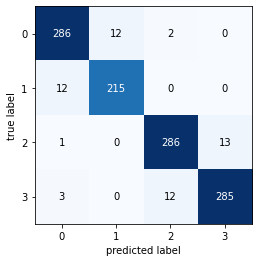

In [50]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_test)

print("Matriz de confusão do modelo nos dados de teste:\n")
plot_confusion_matrix(conf_mat=cm)
plt.show()

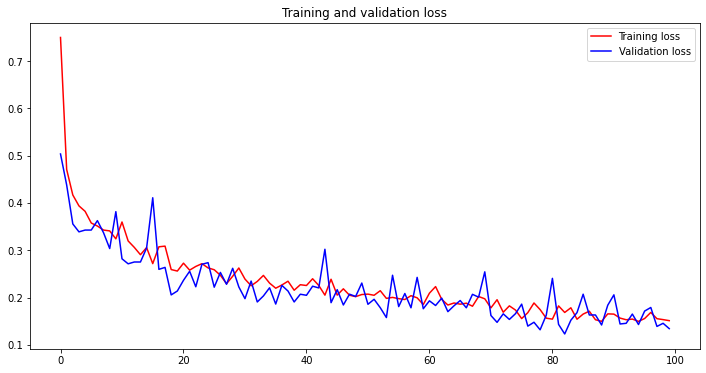

In [51]:
# valor da função de perda NOS DADOS DE TREINO a cada epoch
loss = history.history['loss']

# valor da função de perda NOS DADOS DE VALIDAÇÃO a cada epoch
val_loss = history.history['val_loss']

# numero de epochs
epochs = range(len(loss))

# plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'red', label = 'Training loss')
plt.plot(epochs, val_loss, 'blue', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

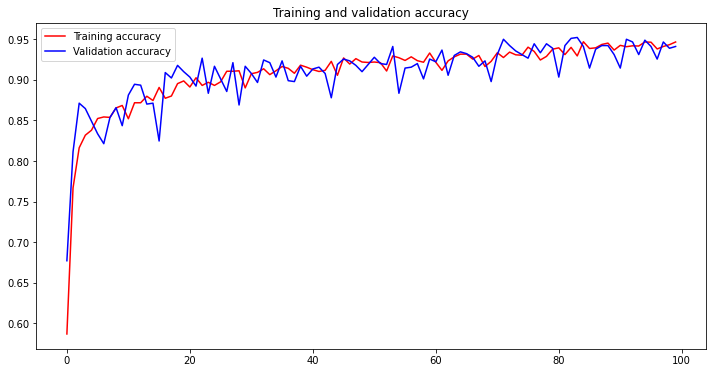

In [52]:
# valor da função de perda NOS DADOS DE TREINO a cada epoch
acc = history.history['accuracy']

# valor da função de perda NOS DADOS DE VALIDAÇÃO a cada epoch
val_acc = history.history['val_accuracy']

# numero de epochs
epochs = range(len(acc))

# plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, 'red', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'blue', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [53]:
# Early stopping

early_stop = EarlyStopping(monitor = 'val_loss', 
                           min_delta = 0.001,
                           patience = 10, 
                           verbose = 1, mode = 'auto')

# setamos os pesos iniciais iguais à versão antes do treinamento pra ter um comparativo mais real.
cnn3.set_weights(pesos_iniciais3)

# treinando a rede neural novamente
# note o argumento "callbacks", ao qual passamos o objeto de early_stop
historico2 = cnn3.fit(X_train, 
                     y_train, 
                     epochs=100, 
                     verbose=1,
                     validation_data=(X_val, y_val),
                     callbacks=[early_stop])

Epoch 1/100
113/113 [==============================] - 4s 34ms/step - loss: 0.7557 - accuracy: 0.5992 - val_loss: 0.4867 - val_accuracy: 0.7370
Epoch 2/100
113/113 [==============================] - 4s 34ms/step - loss: 0.5140 - accuracy: 0.7094 - val_loss: 0.4799 - val_accuracy: 0.7314
Epoch 3/100
113/113 [==============================] - 4s 31ms/step - loss: 0.4860 - accuracy: 0.7319 - val_loss: 0.4708 - val_accuracy: 0.7425
Epoch 4/100
113/113 [==============================] - 4s 32ms/step - loss: 0.4857 - accuracy: 0.7255 - val_loss: 0.4840 - val_accuracy: 0.7192
Epoch 5/100
113/113 [==============================] - 4s 31ms/step - loss: 0.4740 - accuracy: 0.7433 - val_loss: 0.4913 - val_accuracy: 0.7281
Epoch 6/100
113/113 [==============================] - 4s 38ms/step - loss: 0.4703 - accuracy: 0.7369 - val_loss: 0.4818 - val_accuracy: 0.7292
Epoch 7/100
113/113 [==============================] - 5s 43ms/step - loss: 0.4517 - accuracy: 0.7621 - val_loss: 0.4503 - val_accuracy:

In [54]:
# método pra predizer as classes finais
y_pred_train = np.argmax(cnn3.predict(X_train), axis = -1)
y_pred_val = np.argmax(cnn3.predict(X_val), axis = -1)
y_pred_test = np.argmax(cnn3.predict(X_test), axis = -1)

36/36 [==============================] - 0s 10ms/step


In [55]:
# Classification report

print(classification_report(y_train, y_pred_train))
print("############################")
print(classification_report(y_val, y_pred_val))
print("############################")
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       960
           1       0.97      0.90      0.93       723
           2       0.92      0.94      0.93       960
           3       0.93      0.91      0.92       960

    accuracy                           0.93      3603
   macro avg       0.93      0.93      0.93      3603
weighted avg       0.93      0.93      0.93      3603

############################
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       240
           1       0.95      0.84      0.89       181
           2       0.94      0.94      0.94       240
           3       0.93      0.93      0.93       240

    accuracy                           0.92       901
   macro avg       0.92      0.92      0.92       901
weighted avg       0.92      0.92      0.92       901

############################
              precision    recall  f1-score   support

           0     

Matriz de confusão do modelo nos dados de teste:



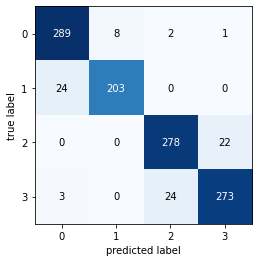

In [56]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_test)

print("Matriz de confusão do modelo nos dados de teste:\n")
plot_confusion_matrix(conf_mat=cm)
plt.show()

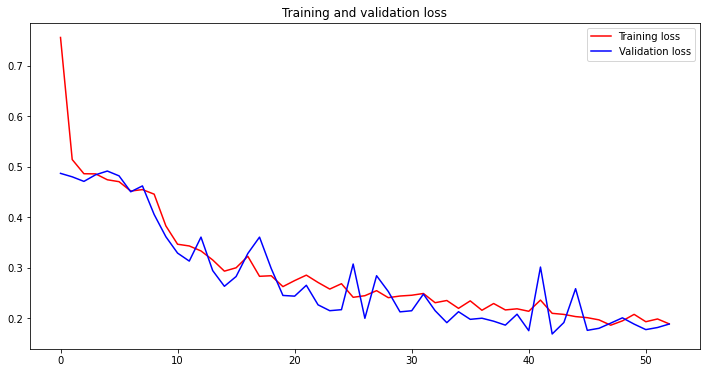

In [57]:
# valor da função de perda NOS DADOS DE TREINO a cada epoch
loss = historico2.history['loss']

# valor da função de perda NOS DADOS DE VALIDAÇÃO a cada epoch
val_loss = historico2.history['val_loss']

# numero de epochs
epochs = range(len(loss))

# plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'red', label = 'Training loss')
plt.plot(epochs, val_loss, 'blue', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

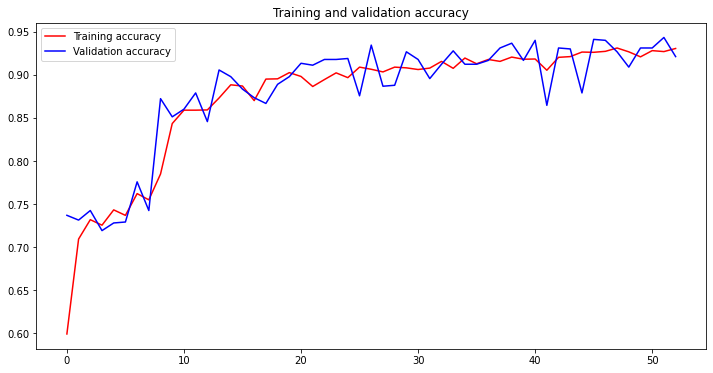

In [58]:
# valor da função de perda NOS DADOS DE TREINO a cada epoch
acc = historico2.history['accuracy']

# valor da função de perda NOS DADOS DE VALIDAÇÃO a cada epoch
val_acc = historico2.history['val_accuracy']

# numero de epochs
epochs = range(len(acc))

# plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, 'red', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'blue', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

---------------------
---------------------
------------------------

# Conclusões

-----------------------------------------

Através das análises realizadas para a classificação de imagens captadas de um satélite de acordo com o seu tipo de terreno, podemos verificar que para o tamanho atual deste dataset um modelo de Machine Learning convencional, como Random Forest ou SVM, já é bastante eficaz e atinge com sucesso o objetivo deste projeto. Cabe destacar aqui que, mesmo com um redimensionamento das imagens para 28x28, os modelos criados tiveram um desempenho muito bom.

Destacamos também que o uso das Redes Neurais CNN criadas também se mostrou muito eficiente, sendo que até mesmo a rede mais simples testada (cnn1) pôde retornar um resultado muito satisfatório. Ou seja, desta forma, mesmo performando com boas métricas, uma rede neural mais robusta (cnn3) não seria necessária para a modelagem destes dados (reiterando, no tamanho atual do dataset). Nas 3 redes neurais testadas utilizamos alguns artifícios para melhorar a perfomance de uma rede convolucional como a camada Dropout e o callback EarlyStopping, que impactaram em um leve aumento no desempenho de suas métricas. 

É possível que, com o passar do desenvolvimento da pesquisa do artigo de origem, e conforme o dataset for alimentado com novas imagens gerando até mesmo diferentes tipos de cenários, uma rede neural se comporte melhor do que um modelo convencional de ML devido à dimensionalidade dos dados.

 > __Ranking dos melhores modelos:__
 - 1º - Rede Neural CNN com 100 épocas;
 - 2º - Rede Neural CNN com camada Dropout
 - 3º - Rede Neural CNN com EarlyStopping antes das 100 épocas
 - 4º - Rede Neural CNN simples
 - 5º - SVM
 - 6º - Random Forest
 - 7º - Decision Tree
 - 8º - Regressão Logística
 - 9º - Perceptron
 - 10º - AdaBoost